In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [63]:
l = os.listdir("../wyztmp")

g = open("../wyztmp/raw_data.txt", "w")

result = []

for line in l:
    if line[-4:] == ".txt":
        with open("../wyztmp/%s" % line, "r") as f:
            content = f.read()
            arr = content.strip('\n').split('\n')
            nowN = 0
            res = []
            for single in arr:
                if single == '':
                    continue
                axes = single.split(' ')
                x = int(axes[0])
                y = int(axes[1])
                z = int(axes[2])
                res.append([x, y, z])
                nowN += 1
                if nowN % 8 == 0:
                    result.append(res)
                    res = []
                g.write("%d %d %d\n"%(x, y, z))
            g.write("\n")
            if nowN != 0:
                result.append(res)
g.close()          

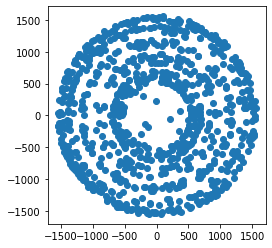

In [4]:
# 直接按点位坐标绘制散点图

X = []
Y = []
for res in result:
    for single in res:
        X.append(single[0] - 59497)
        Y.append(single[1] - 8581)
        
plt.scatter(X, Y)
ax = plt.gca()
ax.set_aspect(1)
plt.show()


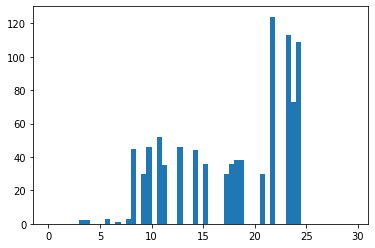

[3.4759918773279663, 49490, 217, -49, 35]
[3.487876603769835, 49829, -10, 223, 172]
[3.501708567346089, 50225, -140, -175, 123]
[3.5687992553518613, 52168, -182, -138, 111]
[5.833651870023185, 139393, 368, 63, 123]
[5.841535342377893, 139770, -219, 303, 35]
[5.861853642406982, 140744, -238, -290, 172]
[6.653700362627175, 181337, 344, -251, 111]
[7.860741680377559, 253097, 499, -64, 172]
[7.867323267199906, 253521, -336, 375, 123]
[7.883582872415943, 254570, -191, -467, 35]
[8.345827222705369, 285298, 283, 453, 37]
[8.348152513617908, 285457, 156, 511, 116]
[8.35060872126248, 285625, 243, 476, 39]
[8.352771924823818, 285773, 358, 397, 101]
[8.353239570856626, 285805, 147, 514, 174]
[8.353897153798938, 285850, 523, 111, 169]
[8.356117940242946, 286002, 129, 519, 102]
[8.356512360316653, 286029, 525, 102, 76]
[8.356512360316653, 286029, 525, 102, 89]
[8.357447207618184, 286093, 477, 242, 114]
[8.357549450197707, 286100, 514, -148, 121]
[8.357622479845869, 286105, 468, 259, 96]
[8.35772472

In [5]:
# 按点位距离绘制散点图

X = []
Y = []
nowN = 0
for res in result:
    for single in res:
        dis = ((single[0] - 59497) ** 2 + (single[1] - 8581) ** 2) ** 0.5 / 64
        X.append(dis)
        Y.append([dis, (single[0] - 59497) ** 2 + (single[1] - 8581) ** 2, single[0] - 59497, single[1] - 8581, nowN])
    nowN += 1
        
b = [x/2 for x in range(60)]
        
plt.hist(X, bins=b)
plt.show()


d = {}
for x in X:
    s = str(int(x * 100000) / 100000)
    if s not in d:
        d[s] = 0
    d[s] += 1
    
# hist2 = []
    
# for key in d:
#     hist2.append([float(key), d[key]])
    
# hist2.sort(key=lambda x:x[0])
# for line in hist2:
#     print(line)

# X.sort()
# for x in X:
#     print(x)
    
Y.sort(key=lambda x:x[0])
for line in Y:
    print(line)
    
print(len(Y))
    

[3.5687992553518613, -142.8290765100596, 0, 111]
[10.96336228079689, -136.3859178508122, 0, 111]
[8.441680098808826, 69.18329553671411, 0, 111]
[10.611859981437043, 166.72083526847373, 0, 111]
[8.374081689392874, -151.952667613958, 1, 147]
[8.380609711746812, -148.02858661768707, 1, 69]
[8.379721150640993, -133.0354796166866, 1, 127]
[8.368715575918744, -123.03732147998106, 1, 149]
[8.37256552769968, -106.03352058843768, 1, 78]
[8.380085326422696, -105.02087724640415, 1, 0]
[8.379342391038213, -86.04378757708103, 1, 139]
[8.374650179261222, -65.06060302042111, 1, 154]
[8.366746165998464, -62.04710201612923, 1, 28]
[8.366746165998464, -62.04710201612923, 1, 128]
[8.368759335319663, -53.044522463335596, 1, 17]
[8.363243847709452, -42.12247515964281, 1, 59]
[8.358148274475932, -38.09105131496279, 1, 66]
[8.36642518119298, -35.114746588770025, 1, 125]
[8.357724720281231, -27.13990592932094, 1, 99]
[8.358484181506835, -23.114207983326832, 1, 32]
[8.358484181506835, -23.114207983326832, 1, 1

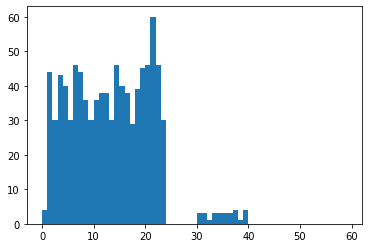

In [34]:
def cat(x):
    base_point = [8.36, 9.25, 9.64, 10.71, 11.01, 12.97, 14.27, 15.18, 17.19, 17.80, 18.32, 18.57, 20.58, 21.60, 21.74, 21.88, 23.03, 23.23, 23.43, 23.75, 24.00, 24.16, 24.38]
    extra_point = [3.48, 5.84, 6.65, 7.86, 9.73, 10.51, 10.56, 10.77, 11.31, 11.45]
    res = 0
    for i in range(len(base_point)):
        if abs(x - base_point[i]) < 0.04:
            res = i+1
    for i in range(len(extra_point)):
        if abs(x - extra_point[i]) < 0.04:
            res = i+30
    return res
            
X = []
Y = []

feature_group = {}
feature_battle = {}

nowN = 0
for res in result:
    for single in res:
        dis = ((single[0] - 59497) ** 2 + (single[1] - 8581) ** 2) ** 0.5 / 64
        theta = math.atan2(single[1] - 8581, single[0] - 59497) / math.pi * 180
        c = cat(dis)
        X.append(c)
        Y.append([dis, theta, c, nowN])
        if str(c) not in feature_group:
            feature_group[str(c)] = []
        feature_group[str(c)].append([dis, theta, c, nowN])
        if str(nowN) not in feature_battle:
            feature_battle[str(nowN)] = []
        feature_battle[str(nowN)].append([dis, theta, c, nowN])
    nowN += 1

Y.sort(key=lambda x:x[1])
Y.sort(key=lambda x:x[2])
for line in Y:
    print(line)
    
b = [x for x in range(60)]
    
plt.hist(X, bins=b)
plt.show()
    

In [35]:
print(feature_battle.keys())

dict_keys(['0', '2', '3', '4', '6', '8', '10', '11', '12', '13', '15', '17', '19', '20', '22', '23', '24', '26', '27', '28', '29', '30', '32', '33', '34', '35', '37', '39', '40', '42', '43', '45', '47', '49', '50', '52', '54', '55', '57', '59', '61', '62', '63', '64', '66', '67', '68', '69', '70', '71', '73', '74', '75', '76', '78', '79', '81', '83', '84', '85', '86', '87', '88', '89', '91', '92', '94', '96', '98', '99', '100', '101', '102', '104', '106', '108', '109', '110', '111', '113', '114', '115', '116', '117', '118', '120', '121', '122', '123', '125', '127', '128', '130', '132', '134', '135', '137', '139', '140', '142', '144', '145', '146', '147', '148', '149', '150', '151', '153', '154', '155', '156', '158', '159', '160', '161', '163', '164', '165', '166', '167', '169', '170', '171', '172', '174'])


In [48]:
absolute_pos = {}

def cluster_from_cat(x):
    pos = absolute_pos[str(x)]
    candidate_pos = {}
    for line in feature_group[str(x)]:
        theta0 = math.atan2(pos[1], pos[0])
        battle = line[3]
        theta1 = line[1]
        print(line)
        for line2 in feature_battle[str(battle)]:
            print("*", line2)
            newPos = getpos(line2[0], line2[1] - (theta1-theta0))
            if str(line2[2]) not in candidate_pos:
                candidate_pos[str(line2[2])] = []
            candidate_pos[str(line2[2])].append(newPos)
            
    for key in candidate_pos:
        print(key)
        print(candidate_pos[key])
        print("=======")
        if int(key) in SAFE_CAT:
            absolute_pos[key] = candidate_pos[key][0]
            
        
def getpos(d, theta):
    theta = theta / 180 * math.pi
    x = d * math.cos(theta)
    y = d * math.sin(theta)
    return [x, y]
        
    
# 24=21

SAFE_CAT = [1, 3, 6, 7, 14, 19, 20, 22] + [2, 5, 9, 13, 17, 21, 23, 24] + [4, 8, 10, 11, 12, 15, 16, 18]
    
pos = getpos(8.380085326422696, 0)
absolute_pos["1"] = pos

pos = getpos(9.257664160203966, 0)
absolute_pos["2"] = pos

pos = getpos(10.703227645493204, 0)
absolute_pos["4"] = pos


cluster_from_cat("1")
print("====")
cluster_from_cat("2")
print("====")
cluster_from_cat("4")
print("====")

absolute_pos["24"] = [-10.038778402589918, -21.804205274139644]

print("[Absolute Pos]")
for key in absolute_pos:
    print(key, absolute_pos[key])


[8.380085326422696, -105.02087724640415, 1, 0]
* [8.380085326422696, -105.02087724640415, 1, 0]
* [14.270963541072655, -39.17906153341278, 7, 0]
* [24.15915045652992, 25.719846434835308, 22, 0]
* [21.598531941575335, 51.57970496400906, 14, 0]
* [23.434510225973362, -55.43048430967781, 19, 0]
* [23.7543787081982, 135.05329838417344, 20, 0]
* [12.985512510342055, 171.07038284494445, 6, 0]
* [9.628664582413546, 30.309978350620064, 3, 0]
[8.3615797326223, 82.05159612610825, 1, 12]
* [24.171678045416087, -147.2447456859996, 22, 12]
* [21.628324572840242, -121.43937653589211, 14, 12]
* [14.27188731661391, 147.92812525914172, 7, 12]
* [8.3615797326223, 82.05159612610825, 1, 12]
[8.377054901821104, 172.06637409376998, 1, 13]
* [23.442187031343728, -138.40451829948873, 19, 13]
* [9.644017838957215, -52.70308403612831, 3, 13]
* [23.74500872716464, 52.02912115328841, 20, 13]
* [12.976127419708085, 88.06786306105063, 6, 13]
* [14.280190059134368, -122.12499844038753, 7, 13]
* [24.16322768724462, -

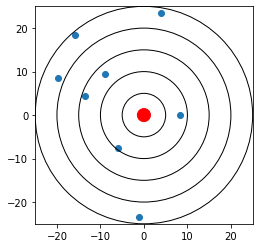

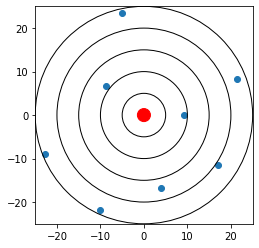

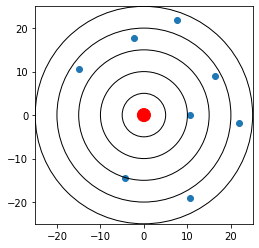

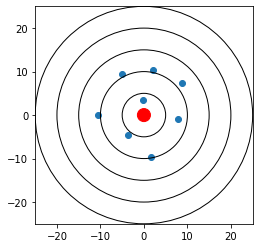

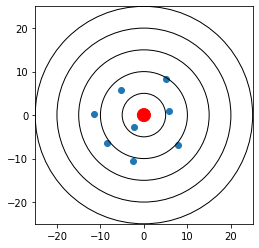

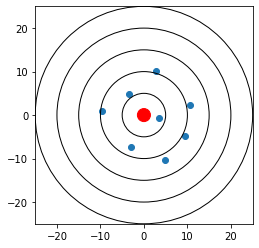

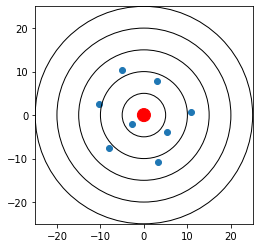

In [62]:
def plot_field(X, Y):
    plt.scatter(X, Y)
    ax = plt.gca()
    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.set_aspect(1)
    
    draw_circle = plt.Circle((0, 0), 1.5, fill=True, color="r")
    ax.add_artist(draw_circle)
    
    for r in [5, 10, 15, 20, 25]:
        draw_circle = plt.Circle((0, 0), r,fill=False)
        ax.add_artist(draw_circle)
    plt.show()


def plot_group(arr):
    X = []
    Y = []
    for c in arr:
        pos = absolute_pos[str(c)]
        X.append(pos[0])
        Y.append(pos[1])
    plot_field(X, Y)
    
def plot_battle(b):
    X = []
    Y = []
    for line in feature_battle[str(b)]:
        pos = getpos(line[0], line[1])
        X.append(pos[0])
        Y.append(pos[1])
    plot_field(X, Y)
    
plot_group([1, 3, 6, 7, 14, 19, 20, 22])
plot_group([2, 5, 9, 13, 17, 21, 23, 24])
plot_group([4, 8, 10, 11, 12, 15, 16, 18])

plot_battle(172)
plot_battle(123)
plot_battle(35)
plot_battle(111)
    